# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Chapter-2" data-toc-modified-id="Chapter-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2</a></div><div class="lev2 toc-item"><a href="#Ex-2.1" data-toc-modified-id="Ex-2.1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ex 2.1</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#Ex-2.2" data-toc-modified-id="Ex-2.2-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ex 2.2</a></div><div class="lev2 toc-item"><a href="#Ex-2.3" data-toc-modified-id="Ex-2.3-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ex 2.3</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev4 toc-item"><a href="#Base-case:-Two-nodes" data-toc-modified-id="Base-case:-Two-nodes-1311"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Base case: Two nodes</a></div><div class="lev2 toc-item"><a href="#Ex-2.4" data-toc-modified-id="Ex-2.4-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ex 2.4</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev4 toc-item"><a href="#Case-I:-Multiply-connected" data-toc-modified-id="Case-I:-Multiply-connected-1411"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Case I: Multiply connected</a></div><div class="lev4 toc-item"><a href="#Case-II:-Singly-Connected" data-toc-modified-id="Case-II:-Singly-Connected-1412"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>Case II: Singly Connected</a></div><div class="lev4 toc-item"><a href="#Case-III:-Unconnected" data-toc-modified-id="Case-III:-Unconnected-1413"><span class="toc-item-num">1.4.1.3&nbsp;&nbsp;</span>Case III: Unconnected</a></div><div class="lev2 toc-item"><a href="#Ex-2.5" data-toc-modified-id="Ex-2.5-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ex 2.5</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ans</a></div>

# Chapter 2

## Ex 2.1

Consider an adjacency matrix A with elements $[A]_{ij} = 1$ if one can reach state $i$ from state $j$ in one timestep, and 0 otherwise. Show that the matrix $[A^k]_{ij}$ represents the number of paths that lead from state $j$ to $i$ in $k$ timesteps. Hence derive an algorithm that will find the minimum number of steps to get from state $j$ to state $i$.


### Ans

> Show that the matrix $[A^k]_{ij}$ represents the number of paths that lead from state $j$ to $i$ in $k$ timesteps.

We can represent getting from one state to the state's neighbors by having a value of 1 in the adjacency matrix, which corresponds to a graph having a distance 1 for every edge. 

The adjacency matrix represents the base case of $k=1$. When the row is the same as the column, i.e. $j=i$, we have a value of 0, since it takes a variable 0 steps to get to itself. When the row isn't the same as the column, then the value is 1 or 0 depending on whether or not an edge exists, by definition. Trivial.

For $k=2$, for any value $i$ and $j$, $[A^2]_{i,j} = \sum_{n=0}^{b=m-1} A_{i, n} \cdot A_{n, j}$. We can see that if $A_{i,n}=1$ and $A_{n,j}=1$, i.e. there's an edge from $i$ to $n$ and $n$ to $j$, then multiplying the two entries leads to 1 (i.e. there's a path from $i$ to $j$ through $n$). This value of 1 represents one path to get from $i$ to $j$ in two time steps. We compute this for all $n$ and get all the number of paths to get from $i$ to $j$ in k=2 timesteps. For $k=l$, where $l>2$, it's the same process. We have $[A^2]_{i,j} = \sum_{n=0}^{b=m-1} A_{i, n}^{k-1} \cdot A_{n, j}$. We're using the previous calculation $A_{i, n}^{k-1}$, which tells us how many paths from $i$ to $n$ there are in $k-1$ time steps. $A_{n, j}$ is 1 if there's an edge from $n$ to $j$, and 0 otherwise. The product $A_{i, n}^{k-1} \cdot A_{n, j}$ then tells us that $j$ can be reached from $i$ through $n$ by $A_{i, n}^{k-1}$ paths, which is the number of ways to get from $i$ to $j$ in $k-1$ timesteps through $n$. Finally, we sum, looping through different values of $n$ to get the total number of paths to go from $i$ to $j$ in $k$ timesteps. QED.

> Hence derive an algorithm that will find the minimum number of steps to get from state $j$ to state $i$.

One algorithm to find the shortest path for any $i,j$ would be to use matrix multiplication of the adjacency matrix. For any pairs of variables $i,j: i \neq j$, the adjacency matrix by itself will have 0 if there's no edge between the two variables, and 1 if there is. We could keep multiplying the adjacency matrix until we get a non-zero value or we multiplied the matrix $m-1$ times, where $m$ is the number of variables (whichever comes first). When $i = j$ (i.e. the diagonal), it is obvious that the amount of steps to take to get from one variable to itself is 0, so we could just substitute 0 in the diagonal.

To check our algorithm's correctness from a software engineering standpoint, we could then use Dijkstra's algorithm to find the shortest path from one node to the other nodes. Running Dijkstra's algorithm on this graph, where the graph is represented with an adjacency matrix whose entries are 1 if there exists an edge between a pair of variables and 0 otherwise, would then tell us the minimum number of steps to get from state $j$ to state $i$. Thus, we could use Dijkstra's algorithm to cross-check the claim that the matrix $[A^k]_{ij}$ represents the number of paths that lead from state $j$ to $i$ in $k$ timesteps.

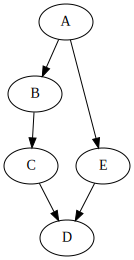

In [104]:
from graphviz import Digraph

# Sample graph
dag = Digraph()
dir(dag)
dag.edge('A', 'B')
dag.edge('B', 'C')
dag.edge('C', 'D')
dag.edge('A', 'E')
dag.edge('E', 'D')
dag

In [18]:
import pandas as pd
import numpy as np

adjacency_matrix = pd.DataFrame(
    [
        [0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]
    ], 
    columns=['A','B','C', 'D', 'E'],
    index=['A','B','C', 'D', 'E'],
)
    

In [38]:
adjacency_matrix

,A,B,C,D,E
A,0,1,0,0,1
B,1,0,1,0,0
C,0,1,0,1,0
D,0,0,1,0,1
E,1,0,0,1,0


In [6]:
adjacency_matrix.dot(adjacency_matrix)

,A,B,C,D,E
A,2,0,1,1,0
B,0,2,0,1,1
C,1,0,2,0,1
D,1,1,0,2,0
E,0,1,1,0,2


In [7]:
adjacency_matrix.dot(adjacency_matrix).dot(adjacency_matrix)

,A,B,C,D,E
A,0,3,1,1,3
B,3,0,3,1,1
C,1,3,0,3,1
D,1,1,3,0,3
E,3,1,1,3,0


In [40]:
zeros = pd.DataFrame(
    np.zeros((adjacency_matrix.shape[0], adjacency_matrix.shape[0])),
    columns=adjacency_matrix.columns,
    index=adjacency_matrix.index
)

In [41]:
adjacency_matrix > zeros

,A,B,C,D,E
A,False,True,False,False,True
B,True,False,True,False,False
C,False,True,False,True,False
D,False,False,True,False,True
E,True,False,False,True,False


In [42]:
zeros.mask(adjacency_matrix > zeros, 1)

,A,B,C,D,E
A,0.0,1.0,0.0,0.0,1.0
B,1.0,0.0,1.0,0.0,0.0
C,0.0,1.0,0.0,1.0,0.0
D,0.0,0.0,1.0,0.0,1.0
E,1.0,0.0,0.0,1.0,0.0


In [53]:
def find_smallest_distance_through_matrix_mult(adjacency_matrix):
    results = pd.DataFrame(
        np.zeros((adjacency_matrix.shape[0], adjacency_matrix.shape[0])),
        columns=adjacency_matrix.columns,
        index=adjacency_matrix.index
    )

    
    for i in range(1, adjacency_matrix.shape[0]):
        if i == 1:
            powered = adjacency_matrix
        else:
            powered = powered.dot(adjacency_matrix)
            
        results = results.mask((results == 0) & (powered > 0), i)
        
    for col in adjacency_matrix.columns:
        results.loc[col, col] = 0 # The minimum steps to get from the variable to itself is 0
        
    return results

In [64]:
algo_distances = find_smallest_distance_through_matrix_mult(adjacency_matrix)
algo_distances

,A,B,C,D,E
A,0.0,1.0,2.0,2.0,1.0
B,1.0,0.0,1.0,2.0,2.0
C,2.0,1.0,0.0,1.0,2.0
D,2.0,2.0,1.0,0.0,1.0
E,1.0,2.0,2.0,1.0,0.0


In [105]:
class AdjacencyMatrix:
    """
    A square matrix where each row (or column) represents a variable. An entry represents the 
    distance between the variable of the row and the variable of the column.
    
    Parameters:
        adj_mat: pd.DataFrame
            A square matrix with indices and columns representing the variables.
    """
    def __init__(self, adj_mat):
        self.adj_mat = adj_mat
    
    def get_neighbors(self, node):
        """
        Returns the neighbors of the given node.
        
        Parameters:
            node: string
        """
        return self.adj_mat[self.adj_mat[node] == 1].index
    
    def get_distance(self, node_1, node_2):
        """
        Returns the distance between node_1 and node_2
        
        Parameters:
            node_1: string
            node_2: string
        """
        return self.adj_mat.loc[node_1, node_2]

In [58]:
def dijkstra(source, variables, graph):
    """
    Dijkstra's Algorithm helps us find the shortest distance from one variable to the others.
    
    Parameters:
        source: string
            The variable we're starting from.
            
        variables: list[string]
            The names of the variables in our graph.
            
        graph: object that responds to the following methods:
            - get_neighbors(node<String>)
            - get_distance(node_1<String>, node_2<String>)
    """
    total_distances = pd.Series(np.inf, index=variables)

    unvisited = [v for v in variables]
    total_distances[source] = 0
    
    while len(unvisited) > 0:
        visitables = total_distances[total_distances.index.isin(unvisited)]
        curr_node = visitables[visitables == visitables.min()].index[0]
        unvisited.remove(curr_node)
        
        neighbors = graph.get_neighbors(curr_node)
        
        unvisited_neighbors = list(set(unvisited).intersection(set(neighbors)))
        
        for neighbor in unvisited_neighbors:
            alt_dist = total_distances[curr_node] + graph.get_distance(curr_node, neighbor)

            if alt_dist < total_distances[neighbor]:
                total_distances[neighbor] = alt_dist
                
    return total_distances

In [21]:
adj_matrix = AdjacencyMatrix(adjacency_matrix)

In [60]:
dijkstra_distances = pd.DataFrame(
    [dijkstra(source=i, variables=adjacency_matrix.columns, graph=adj_matrix) for i in adjacency_matrix.columns],
    index=adjacency_matrix.columns
)

In [65]:
# We show that in this arbitrary example, the distances computed by dijkstra's algorithm matches the distances 
# gathered by matrix multiplication of the adjacency matrix.
dijkstra_distances.equals(algo_distances)

True

## Ex 2.2

For an $N × N$ symmetric adjacency matrix $A$, describe an algorithm to find the connected components. You may wish to examine connectedComponents.m.


In [97]:
# A -> B -> C
# D -> E
two_components = pd.DataFrame([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
    ], 
    columns=['A','B','C','D','E'],
    index=['A','B','C','D','E']
)

adj_matrix_two_comps = AdjacencyMatrix(two_components)


def find_set_with_item(item, sets):
    for set in sets:
        if item in set:
            return set
def get_connected_components(adjacency_matrix):
    """
    Parameters:
        adjacency_matrix: pandas.DataFrame
            A square matrix where values represent edge weights (0 being no edge).
    
    Returns: list of sets
        Each set is a connected component.
    """
    sets = []
    for col in adjacency_matrix.columns:
        sets.append(set({col}))
    
    for col in adjacency_matrix.columns:
        neighbors = adjacency_matrix[adjacency_matrix[col] > 0].index
        
        for neighbor in neighbors:
            set_1 = find_set_with_item(col, sets)
            set_2 = find_set_with_item(neighbor, sets)

            sets.remove(set_1)
            
            try:
                sets.remove(set_2)
            except ValueError:
                pass
            
            sets.append(set_1.union(set_2))
            
    return sets
            

In [98]:
get_connected_components(two_components)

[{'A', 'B', 'C'}, {'D', 'E'}]

## Ex 2.3

Show that for a connected graph that is singly-connected, the number of edges $E$ must be equal to the number of nodes minus 1, $E = V −1$. Give an example graph with $E = V − 1$ that is not singly-connected. Hence the condition $E = V − 1$ is a necessary but not sufficient condition for a graph to be singly-connected.


### Ans

> Show that for a connected graph that is singly-connected, the number of edges $E$ must be equal to the number of nodes minus 1, $E = V −1$.

Singly-connected graphs have the property that there is only one path to go any arbitrary point A and any arbitrary point B. 

#### Base case: Two nodes

A singly connected graph involving two nodes means there is a path between those two nodes. $E = V-1$ clearly holds.

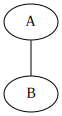

In [108]:
from graphviz import Graph

# Sample graph
g = Graph()
g.edge('A', 'B')
g

When there are three nodes, $E = V-1$ still holds. For example:

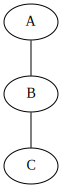

In [109]:
from graphviz import Graph

# Sample graph
g = Graph()
g.edge('A', 'B')
g.edge('B', 'C')
g

Adding a third edge (i.e. from $A$ to $C$) would make this graph not singly-connected. If we were to do that, there would be multiple paths to get from $A$ to $C$: $A-B-C$ and $A-C$, which makes this not a singly-connected graph. For any number of vertices, $E=V-1$ holds for a singly-connected graph; adding more edges would result in a contradiction.

> Give an example graph with $E = V − 1$ that is not singly-connected. Hence the condition $E = V − 1$ is a necessary but not sufficient condition for a graph to be singly-connected.

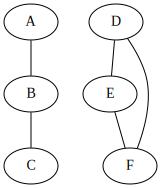

In [111]:
from graphviz import Graph

# Sample graph
g = Graph()
g.edge('A', 'B')
g.edge('B', 'C')
g.edge('D', 'E')
g.edge('E', 'F')
g.edge('D', 'F')
g

## Ex 2.4

Describe a procedure to determine if a graph is singly-connected.

### Ans

For any variable A, we should be able to reach any other variable B, and there should only be one path from A to B.

We could use an adjacency matrix to represent the graph, where the value of 1 in a cell represents the existence of an edge, and use powers of the adjacency matrix to count how many paths there are from any node $A$ to another node $B$. If there are values greater than 1 in the powers (i.e. there's multiple paths), return False. If a location in the adjacency matrix and its powers is always 0, with the exception of the diagonal (which represents the nodes getting to themselves), then it means that there is no path from $A$ to $B$, which means it's not a connected graph, and by extension, not a singly-connected graph.

In [141]:
import numpy as np
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
def get_neighbors(node, adjacency_matrix):
    return adjacency_matrix[adjacency_matrix[node]].index

In [156]:
def is_singly_connected(adjacency_matrix):
    """
    Are the number of edges = vertices - 1, and are all the vertices visitable?
    
    Parameters:
        adjacency_matrix: pd.DataFrame
            A square matrix where indices and columns represent variables.
            
    Returns: bool
        If the adjacency matrix is singly connected, return True, and False otherwise.
    """
    
    number_of_edges = np.tril(adjacency_matrix).sum()
    e_is_v_minus_1 = number_of_edges == adjacency_matrix.shape[0] - 1
    columns = adjacency_matrix.columns

    components = get_connected_components(adjacency_matrix)
    if len(components) == 1 and components[0].intersection(set(columns)) == set(columns) and e_is_v_minus_1:
        return True   
    
    return False

#### Case I: Multiply connected

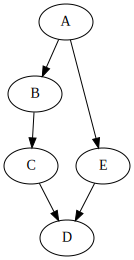

In [104]:
from graphviz import Digraph

# Sample graph
dag = Digraph()
dir(dag)
dag.edge('A', 'B')
dag.edge('B', 'C')
dag.edge('C', 'D')
dag.edge('A', 'E')
dag.edge('E', 'D')
dag

In [152]:
adjacency_matrix_1 = pd.DataFrame(
    [
        [0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]
    ], 
    columns=['A','B','C', 'D', 'E'],
    index=['A','B','C', 'D', 'E'],
)

assert is_singly_connected(adjacency_matrix_1) == False

#### Case II: Singly Connected

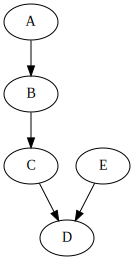

In [119]:
from graphviz import Digraph

# Sample graph
dag = Digraph()
dir(dag)
dag.edge('A', 'B')
dag.edge('B', 'C')
dag.edge('C', 'D')
#dag.edge('A', 'E')
dag.edge('E', 'D')
dag

In [157]:
adjacency_matrix_2 = pd.DataFrame(
    [
        [0, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0]
    ], 
    columns=['A','B','C', 'D', 'E'],
    index=['A','B','C', 'D', 'E'],
)

assert is_singly_connected(adjacency_matrix_2) == True

#### Case III: Unconnected

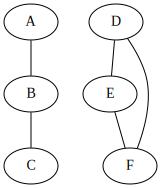

In [111]:
from graphviz import Graph

# Sample graph
g = Graph()
g.edge('A', 'B')
g.edge('B', 'C')
g.edge('D', 'E')
g.edge('E', 'F')
g.edge('D', 'F')
g

In [158]:
adjacency_matrix_3 = pd.DataFrame(
    [
        [0, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 1, 0],
    ], 
    columns=['A','B','C', 'D', 'E', 'F'],
    index=['A','B','C', 'D', 'E', 'F'],
)

assert is_singly_connected(adjacency_matrix_3) == False

## Ex 2.5

Describe a procedure to determine all the ancestors of a set of nodes in a DAG.

### Ans

I interpret this question to look for the combined ancestors (not the common ancestors) of a set of nodes. One way to do this is to recursively get the parents of each variable in the set. Then we could find the union of these results.

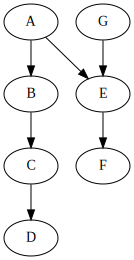

In [161]:
from graphviz import Digraph

# Sample graph
dag = Digraph()
dir(dag)
dag.edge('A', 'B')
dag.edge('B', 'C')
dag.edge('C', 'D')
dag.edge('A', 'E')
dag.edge('E', 'F')
dag.edge('G', 'E')
dag

In [162]:
def get_parents(node, adj_matrix):
    return adj_matrix[adj_matrix[node] == 1].index

In [163]:
def get_ancestors(node, adj_matrix):
    parents = get_parents(node, adj_matrix)
    
    ancestors = set(parents)
    
    for parent in parents:
        ancestors = ancestors.union(get_parents(parent, adj_matrix))
        
    return ancestors

In [167]:
def get_ancestors_of_vars(vars, adj_matrix):
    ancestors = set({})
    for var in vars:
        ancestors = ancestors.union(get_ancestors(var, adj_matrix))
        
    return ancestors

In [169]:
adjacency_matrix = pd.DataFrame(
    [
        [0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]
    ], 
    columns=['A','B','C', 'D', 'E', 'F', 'G'],
    index=['A','B','C', 'D', 'E', 'F', 'G'],
)


assert get_ancestors_of_vars(['C', 'F'], adjacency_matrix) == {'A', 'B', 'E', 'G'}